In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [7]:
x,y =mnist['data'], mnist['target']

In [10]:
x.shape


(70000, 784)

In [11]:
y.shape

(70000,)

In [12]:
%matplotlib inline

In [13]:
import matplotlib
import matplotlib.pyplot as plt

In [19]:
some_digit = x.iloc[36001]
some_digit_image = some_digit.values.reshape(28,28)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

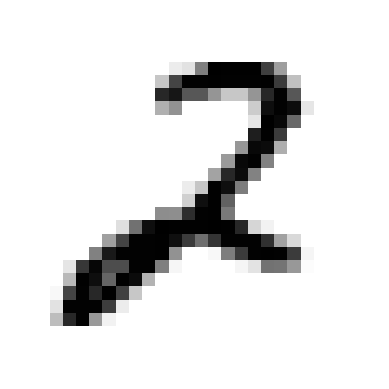

In [21]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation ="nearest")
plt.axis("off")

In [24]:
y[36001]

'2'

In [25]:
x_train = x[:60000]

In [26]:
x_test = x[60000:]

In [27]:
y_train = y[:60000]

In [28]:
y_test = y[60000:]

In [45]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

# Creating a 2 Detector

In [62]:
y_train = y_train.astype(np.int8)
y_test= y_test.astype(np.int8)
y_train_2 = (y_train ==2)
y_test_2 = (y_test==2)

In [63]:
y_train

,class
21291,6
50845,9
59276,7
9209,0
11122,7
...,...
2732,4
49783,5
22294,0
33935,1


In [64]:
y_test_2

,class
60000,False
60001,True
60002,False
60003,False
60004,False
...,...
69995,True
69996,False
69997,False
69998,False


In [65]:
from sklearn.linear_model import LogisticRegression

In [69]:
clf = LogisticRegression(tol = 0.1)

In [72]:
clf.fit(x_train, y_train_2)

LogisticRegression(tol=0.1)

In [71]:
clf.predict([some_digit])

array([ True])

In [74]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,x_train,y_train_2,cv=3,scoring = "accuracy")

In [75]:
a.mean()

np.float64(0.9793)